<div style="width: 100%; max-width: 100%; background-color: #f0f0f0; border: 2px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h2 style="color: #18453B; text-align: center;">Homework 04: Imputation</h2>
  
  <p style="color: #34495e; line-height: 1.6;">
    This HW is lighter than others to allow you to complete your project. Only 40 points total. 
  </p>
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Problem 1: Test of MCAR Missingness (10 points)</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    A crucial first step before imputation is testing for the quality/mechanism of missingness. We typically start with a test for MCAR since that might be the easiest to repair, perhaps using a deletion method. Although we have mentioned this many times in the lecture, we have not actually discussed how to do it. 
    The plan for this HW problem is for you to learn and implement highly simplifed versions of two methods: the Expectation-Maximization (EM) and Little's MCAR Test methods. In the the real-world you would use libraries (https://pypi.org/project/missingpy/) for these, and not use a simplified approach, but then you would also not know what you are doing. This HW shows you what these methods are doing so that you can intelligently use full libraries. 
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>Write Python code that reads the iris dataset.</li>
    <li>Make a heatmap of the correlation marix of the four numeric input features; this is the ground truth.</li>
    <li>Pick a column (e.g., `sepal width`) and randomly replace the values with `NaN`.</li>
    <li>Make a new heatmap and compare it with the original.</li>
    <li>Find the mean and variance of the (remaining) values in that column.</li>
    <li>Sample a normal distribution function with that mean and variance and create a new, fixed data matrix. This is the first step in the EM method: in a full implementation you would iterate new versions until convergence. 
    <li>Make yet a new heatmap. Note that you imputed in the previous (simplified) EM step completely at random: you literally used a random number generator with no bias. 
    <li>Compare the imputed-data heatmap to the heatmap from the data with missing values. Did the imputation, done completely at random,  change the correlation structure? This is the essence of Little's MCAR Test: the missing values are assumed to be MCAR, so you fill them accordingly and then see if that assumption is reasonable. (The Little Test is normally cast as a hypothesis test with a p value.) 
    <li>Once your have a working code, play with various choices and write down what you see. That is, change the column, change the percentage missing, etc. 
    <li>In a markdown cell, summarize what you learned and what advice you would give to your future self when you are working on data science projects. 
  </ul>

  I will give you some helper code to start with! If you use it, add detailed comments.
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

Correlation matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  

Correlation matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.137561           0.871754   
sepal width (cm)           -0.137561          1.000000          -0.428565   
petal length (cm)           0.871754         -0.428565           1.000000   
petal width (cm)            0.817941         -0.382575           0.962865  

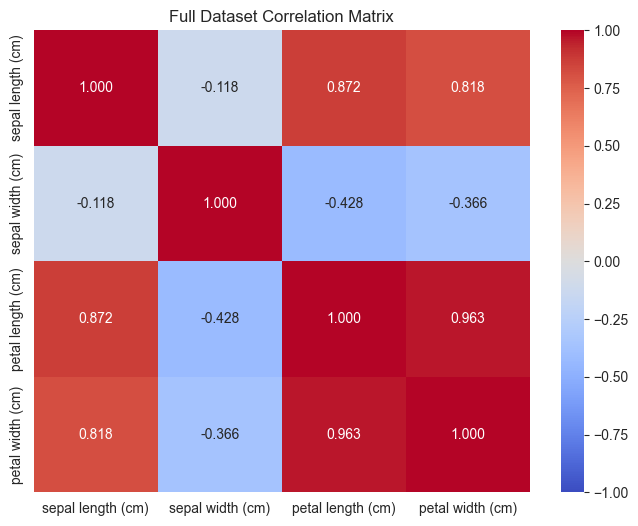

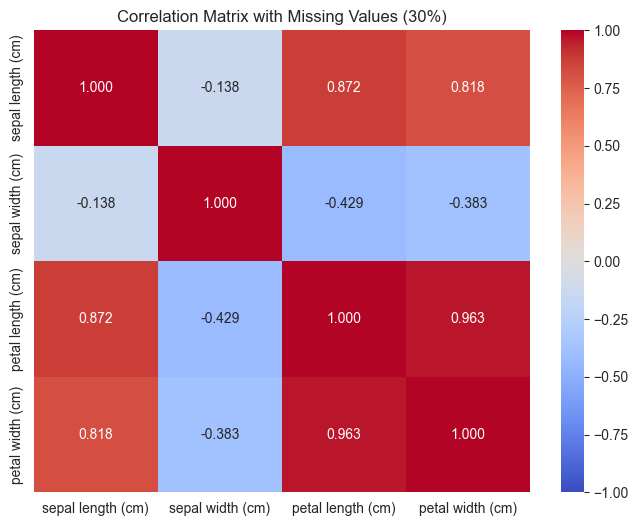

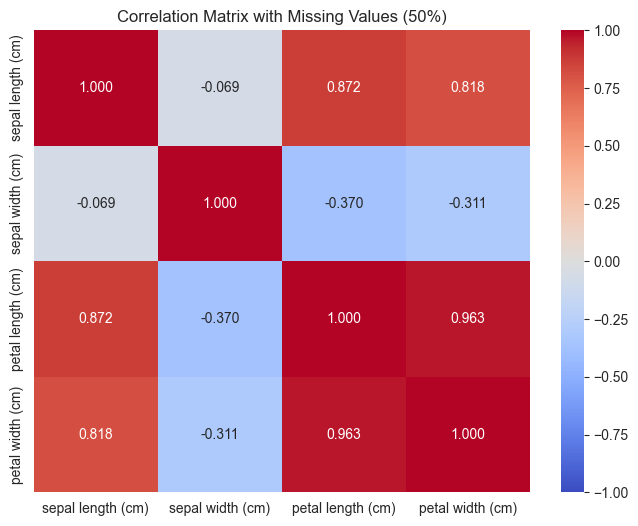

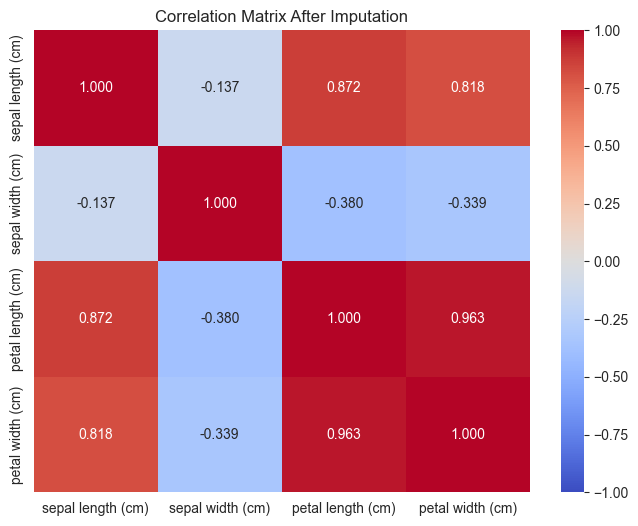

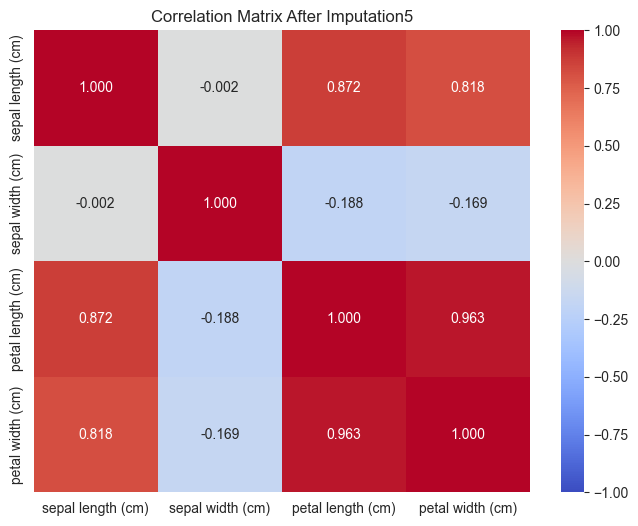

In [4]:
### ANSWER

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris() # load the iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) # create a dataframe

# plot the correlation heatmap
def plot_heatmap(dataframe, title):
    plt.figure(figsize=(8, 6)) # set figure size
    sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f") # plot heatmap
    print(f"Correlation matrix:\n{dataframe.corr()}\n") # print correlation matrix
    plt.title(title) # set title
    # plt.show()

def plot_heatmap_subplots(missing_data, imputed_data):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # create subplots

    sns.heatmap(missing_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f", ax=axes[0]) # plot heatmap for missing data
    axes[0].set_title("Correlation Matrix with Missing Values") # set title

    sns.heatmap(imputed_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f", ax=axes[1])  # plot heatmap for imputed data
    axes[1].set_title("Correlation Matrix After Imputation") # set title

    plt.tight_layout() # adjust layout
    # plt.show()

# full dataset correlation heatmap
plot_heatmap(df, "Full Dataset Correlation Matrix")

# missing values in one column (sepal width)
def introduce_missingness_in_column(dataframe, column, missing_rate=0.3):
    df_missing = dataframe.copy() # copy the dataframe
    mask = np.random.rand(df_missing.shape[0]) < missing_rate # create a mask for missing values
    df_missing.loc[mask, column] = np.nan # introduce missing values
    return df_missing

df_missing = introduce_missingness_in_column(df, 'sepal width (cm)', missing_rate=0.3)

# heatmap with missing values
plot_heatmap(df_missing, "Correlation Matrix with Missing Values (30%)")

df_missing5 = introduce_missingness_in_column(df, 'sepal width (cm)', missing_rate=0.5)
plot_heatmap(df_missing5, "Correlation Matrix with Missing Values (50%)")

# mean and variance of remaining values in 'sepal width'
mean_val = df_missing['sepal width (cm)'].mean()
std_val = df_missing['sepal width (cm)'].std()

# impute missing values using randn (Poor Man's EM)
missing_indices = df_missing['sepal width (cm)'].isna()
df_imputed = df_missing.copy()
df_imputed.loc[missing_indices, 'sepal width (cm)'] = np.random.randn(missing_indices.sum()) * std_val + mean_val

# heatmap after imputation
plot_heatmap(df_imputed, "Correlation Matrix After Imputation")

# mean and variance of remaining values in 'sepal width'
mean_val = df_missing5['sepal width (cm)'].mean()
std_val = df_missing5['sepal width (cm)'].std()

# impute missing values using randn (Poor Man's EM)
missing_indices = df_missing5['sepal width (cm)'].isna()
df_imputed = df_missing5.copy()
df_imputed.loc[missing_indices, 'sepal width (cm)'] = np.random.randn(missing_indices.sum()) * std_val + mean_val

# heatmap after imputation
plot_heatmap(df_imputed, "Correlation Matrix After Imputation5")


✏️ **Answer:**

By looking at these correlation matrices can tell us that missing data introduces severe instability into statistical analysis. The correlations involving the incomplete column can randomly weaken or strengthen. With 30% and 50% these give use examples of weaken and strengthen. corrlation. Therefore, the essential advice for any future project is to adopt a disciplined workflow for handling missing values. First step is MCAR, MAR, or MNAR, second choose imputation strategy, such as MICE or k-NN imputation.

<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Problem 2: Correlations and MAR Missingness (10 points)</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    Next, we will do the same set of steps as in the previous problem, but now for MAR. To make this easy, you will use almost everything you just did in the previous problem. That is, use the iris dataset, make correlation heatmaps, and so on. The difference is that you will not create the missing values radnomly but according to some pattern in another column. 
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>Copy your code from problem 1 to here and get ready to modify it.</li>
    <li>Pick a column to add missing values to.</li>
    <li>Add the missing values, `np.nan`, to the column based on values in one of the other columns. You can do this however you want, but an easy way to start is by creating missing values when the value in another column is above a certain value.</li>
    <li>Again, compare correlation heatmaps for a few choices (e,g,m columns, missingness rules, etc.).</li>
    <li>How did the correlation heatmap change for this MAR case compared with the MCAR case? 
    <li>In a markdown cell, summarize what you learned and what advice you would give to your future self when you are working on data science projects.</li>
  </ul>

  Yes, I will give you some background and code to start with! AS always, comment it if you use any of it.
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

Correlation matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  



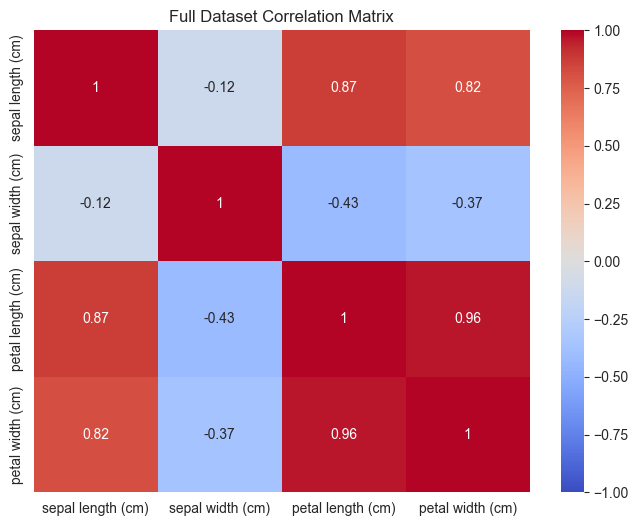

Correlation matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.168932           0.871754   
sepal width (cm)           -0.168932          1.000000          -0.653294   
petal length (cm)           0.871754         -0.653294           1.000000   
petal width (cm)            0.817941         -0.619315           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.619315  
petal length (cm)          0.962865  
petal width (cm)           1.000000  



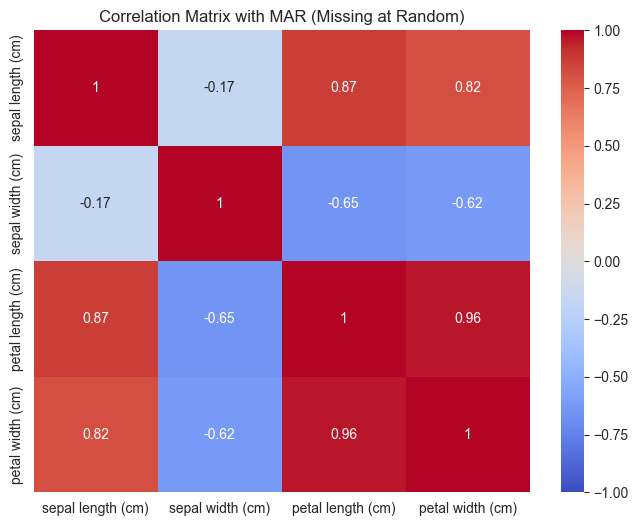

Correlation matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.485105           0.871754   
sepal width (cm)            0.485105          1.000000          -0.579697   
petal length (cm)           0.871754         -0.579697           1.000000   
petal width (cm)            0.817941         -0.515132           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.515132  
petal length (cm)          0.962865  
petal width (cm)           1.000000  



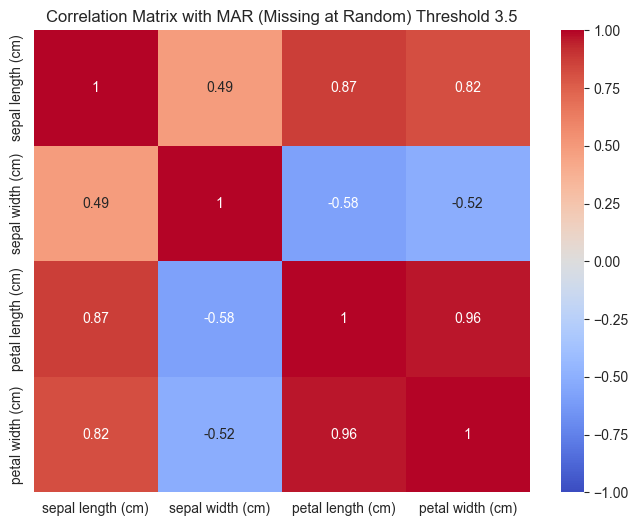

In [5]:
### ANSWER

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

def plot_heatmap(dataframe, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    print(f"Correlation matrix:\n{dataframe.corr()}\n")
    plt.title(title)
    plt.show()

plot_heatmap(df, "Full Dataset Correlation Matrix")

# MAR: Make 'sepal width' missing based on 'petal length'
def introduce_MAR(dataframe, column_to_remove, reference_column, threshold):
    df_mar = dataframe.copy()
    
    # 'petal length' is above the threshold
    mask = df_mar[reference_column] > threshold
    
    # add missing values in 'sepal width' where 'petal length' is above the threshold
    df_mar.loc[mask, column_to_remove] = np.nan
    return df_mar

# set 'petal length' threshold for MAR
df_mar = introduce_MAR(df, 'sepal width (cm)', 'petal length (cm)', threshold=4.5)

# heatmap with MAR
plot_heatmap(df_mar, "Correlation Matrix with MAR (Missing at Random)")

df_mar = introduce_MAR(df, 'sepal width (cm)', 'petal length (cm)', threshold=3.5)
plot_heatmap(df_mar, "Correlation Matrix with MAR (Missing at Random) Threshold 3.5")

✏️ **Answer:**

In the MCAR case, where missing values were introduced completely at random, the overall correlation structure of the Iris dataset are kind of similar, though correlations weakened slightly due to loss of data. However, in the MAR where missingness in sepal width depended on sepal length—the correlation patterns changed more noticeably and even became more biased, with some relationships strengthening or weakening depending on which rows were removed. This is because MAR missingness removes data in a way that depends on another variable which will distorting the observed relationships.

What i will advise me in the future is that while MCAR mainly reduces statistical analysis and MAR can bias the results therefore, before analyzing or imputing data, it’s important to check whether missingness is related to other variables.

<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Problem 3: MAR Test (10 points)</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    Yet again, you will use the same codes from above. In problem 2 you explored MAR bit didn't actually perform a test. Let's create MAR data and create a test. As mentioned in the lecture, we can do this by creating an "indicator" variable. (This was the variable "R" in the missingness diagrams.) Again, we'll do this in a simple way so that you truly see it. In the real world you would use a machine learning classifier for this, but that isn't necessary to understand the MAR test itself. 
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>Copy the MAR code over.</li>
    <li>Add a column to the dataframe that is either 0, not missing, or 1, missing.</li>
    <li>To test for MAR, we need to see if those 0's and 1's are correalted with values in one of the other columns.</li>
    <li>Perform that test. (Do this however you wish; it is you who needs to be convinced.)</li>
    <li>Describe what you see. Keep in mind that you used known correlations to create the MAR version of the dataset in the first place, so your test should be quite clear.</li>
  </ul>

  I will give you some background and code to start with! Don't look at it unless you plan to completely comment it! 
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

Correlation between 'sepal width missing' and 'petal length': 0.792
P-value: 0.000


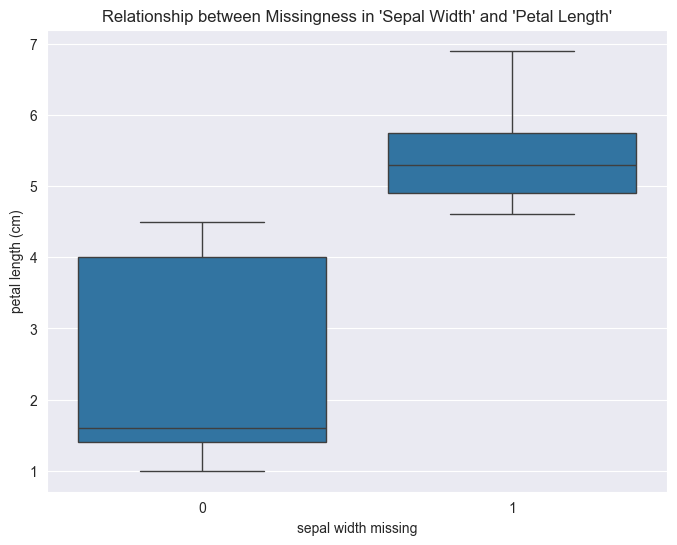

Correlation between 'sepal width missing' and 'petal length': 0.920
P-value: 0.000


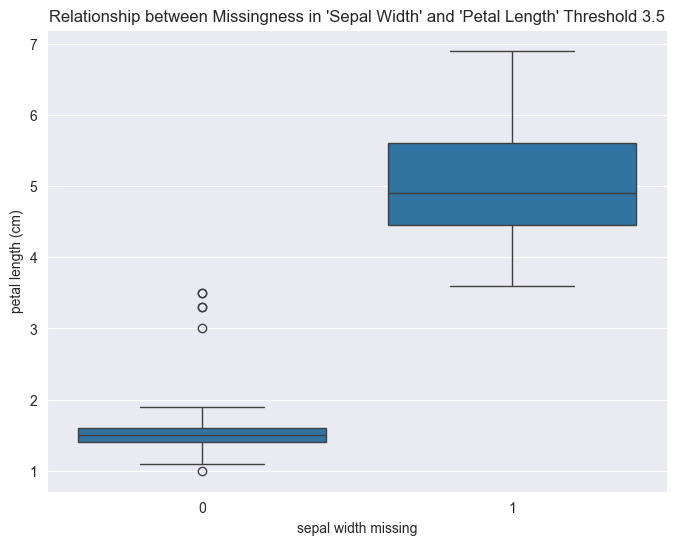

In [6]:
### ANSWER

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import pearsonr

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 1. Introduce MAR: Make 'sepal width' missing based on 'petal length'
def introduce_MAR(dataframe, column_to_remove, reference_column, threshold):
    df_mar = dataframe.copy()
    
    # Rows where 'petal length' is above the threshold
    mask = df_mar[reference_column] > threshold
    
    # Introduce missing values in 'sepal width' where 'petal length' is above the threshold
    df_mar.loc[mask, column_to_remove] = np.nan
    return df_mar

# Set 'petal length' threshold for MAR
df_mar = introduce_MAR(df, 'sepal width (cm)', 'petal length (cm)', threshold=4.5)

# 2. Add an indicator column for missingness in 'sepal width'
df_mar['sepal width missing'] = df_mar['sepal width (cm)'].isna().astype(int)

# 3. Check for correlation between 'sepal width missing' and 'petal length'
correlation, p_value = pearsonr(df_mar['sepal width missing'], df_mar['petal length (cm)'])

print(f"Correlation between 'sepal width missing' and 'petal length': {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

# Visualize the relationship
plt.figure(figsize=(8, 6))
sns.boxplot(x='sepal width missing', y='petal length (cm)', data=df_mar)
plt.title("Relationship between Missingness in 'Sepal Width' and 'Petal Length'")
plt.show()

df_mar = introduce_MAR(df, 'sepal width (cm)', 'petal length (cm)', threshold=3.5)
df_mar['sepal width missing'] = df_mar['sepal width (cm)'].isna().astype(int)
correlation, p_value = pearsonr(df_mar['sepal width missing'], df_mar['petal length (cm)'])
print(f"Correlation between 'sepal width missing' and 'petal length': {correlation:.3f}")
print(f"P-value: {p_value:.3f}")
plt.figure(figsize=(8, 6))
sns.boxplot(x='sepal width missing', y='petal length (cm)', data=df_mar)
plt.title("Relationship between Missingness in 'Sepal Width' and 'Petal Length' Threshold 3.5")
plt.show()

✏️ **Answer:**

The two distributions are completely separate. which mean knowing the petal length gives us a huge amount of information about whether the sepal width is missing. This is expected from our MAR analysis.

---
## <font color=#18453B> Problem #4 Update on Your Project (10 pts) </font>

![missing](https://www.crosstab.io/articles/streamlit-review/worst_case_app.png)

By now you should have decided on the main topic of your project and the data that is going to be used to inform it. (If not, do that now!)
Your project is due at midnight, **October 19.**

For this HW, answer these questions:
1. clearly articulate the goal of your project (this goal might not be reached until the second half of the semester, of which half will be done by the midterm)
2. what are the datasets you plan to use?
3. describe the data: will you need to use, for example, encoding of any kind? 
4. what is your IDA strategy? 
5. list the detailed steps of your EDA strategy
6. are there imbalances in your dataset? how will you handle this? 
7. give a detailed account of your visualization plan, including why you made the choices you did 
8. all of this will end up in a Streamlit app: describe your planned layout and logic behind it




✏️ **Answer:**
1. My project goal is to analyze a dataset related uber rides dataset, to uncover patterns and insights about ride demand, and prediction on ride cancellations. The analysis will include data cleaning, exploratory data analysis (EDA), and visualization to provide a comprehensive understanding of the factors influencing ride demand and cancellations, then build a predictive model to forecast ride cancellations based on various features in the dataset.
2. I plan to use the dataset from [Kaggle](https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard) and i also plan to use a weather dataset if i can find one that matches the time and location of the uber rides.
3. The dataset requires some data preprocessing, includes one-hot encoding categorical variables, scaling numerical features for the neural network, and transforming date/time features for time-series analysis. I will also clean and validate the data to handle any outliers or inconsistencies.
4. My IDA strategy focuses on understanding data quality and structure before deeper analysis. I will assess data completeness, types, and unique counts per column; check for duplicates and missing values; summarize key statistics; and explore distributions of target and predictor variables. The goal is to ensure the dataset is reliable, clean, and well-understood before modeling.
5.
- Examine basic statistics using .describe() and .info() to understand feature types and ranges.
- Check for duplicates and remove them if necessary.
- Identify and quantify missing values in each column.
- Analyze distributions of numeric features
- Study correlations between features and the cancellation flag
6. If the dataset shows an imbalance between canceled and completed rides, I will use techniques like weighting classes in the loss function to ensure the model pays more attention to the minority class.
7.
- Histograms & Boxplots: for distributions and outlier detection.
- Heatmaps: for correlation and feature relationships.
- Line charts: to visualize time-based ride demand trends.
- Bar charts: to compare categorical patterns.
- Scatter plots: for multi-variable relationships.
8.
- Home Page: brief project summary and data source information.
- IDA Page: data quality checks and initial statistics.
- EDA Page: interactive visualizations and key statistics.
- Prediction Page: user inputs ride details and then app outputs cancellation probability.
- Insights Page: summary of main findings and actionable recommendations.


---
## Congratulations, you're done!

### 🛑 IMPORTANT: Before Submission

**STOP!** Before submitting your notebook, please follow these steps:

### Step 1: Restart Your Kernel

**Jupyter Notebook (Classic):**
- Go to `Kernel` → `Restart & Clear Output`

**JupyterLab:**
- Go to `Kernel` → `Restart Kernel and Clear All Outputs...`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Restart" and select `Jupyter: Restart`
- Then select `Clear All Output`

**PyCharm:**
- Go to `Run` → `Restart Kernel` (or click the restart button in the toolbar)
- Go to `Cell` → `All Output` → `Clear`

### Step 2: Run All Cells

**Jupyter Notebook (Classic):**
- Go to `Cell` → `Run All`

**JupyterLab:**
- Go to `Run` → `Run All Cells`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Run All" and select `Jupyter: Run All Cells`

**PyCharm:**
- Go to `Cell` → `Run All` (or use `Ctrl+Shift+F10` / `Cmd+Shift+R`)

### Step 3: Verify Everything Works

Check that all cells execute without errors and produce the expected output

This ensures that your notebook will run correctly when graded and that you haven't missed any dependencies or variable definitions that might exist only in your current session.

*Your submission will be tested in a fresh environment, so this step is crucial for full credit!*


### Step 4: Submit 
Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "Homework" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!


&#169; Copyright 2025, Department of Computational Mathematics, Science and Engineering at Michigan State University.